In [54]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, normalize
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegressionCV
import pickle

In [72]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
with open("ccdf3.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [40]:
with open("ccdf_upsampled_test.pkl", 'rb') as picklefile: 
    ccdf_up_test = pickle.load(picklefile)
    
    
X_up_test = ccdf_up_test.drop('default',1)
y_up_test = ccdf_up_test.default

In [41]:
with open("ccdf_upsampled_train.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [42]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [43]:
X_up_test_norm = normalize(ccdf_up_test.drop('default',1))

In [44]:
X_up_train_norm = normalize(ccdf_up.drop('default',1))

In [45]:
X = ccdf.drop('default',1)
y = ccdf['default']

X_up = ccdf_up.drop('default',1)
y_up = ccdf_up['default']

X_down = ccdf_down.drop('default',1)
y_down = ccdf_down['default']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.3, random_state=1234)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
    
y_obs = y_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=10),
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(),
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print('\n')
    print (alg_label)
    print ('-'*20)
    print
    print ("classification report")
    print (classification_report(y_obs, y_pred))
    print
    print ('   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print ('   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print ('   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print ('   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    



KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.79      0.97      0.87      6863
          1       0.43      0.09      0.15      1886

avg / total       0.72      0.78      0.72      8749

   accuracy score             0.7773 
   precision score            0.4255 
   recall score               0.0938 
   f1 score                   0.1538 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      6863
          1       0.00      0.00      0.00      1886

avg / total       0.62      0.78      0.69      8749

   accuracy score             0.7842 
   precision score            0.0000 
   recall score               0.0000 
   f1 score                   0.0000 


SVC
--------------------
classification report
             precision    recall  f1-score   support

          0       0.79      1.00 

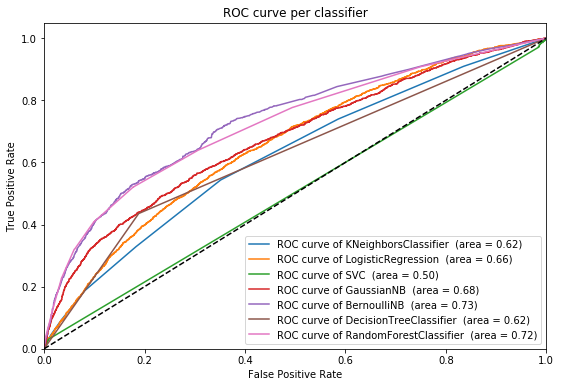

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
y_obs = y_test
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([
            KNeighborsClassifier(n_neighbors=10), 
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(),
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)

    try:
        y_score = alg.fit(X_train, y_train).decision_function(X_test)
    except:
        y_score = (alg.fit(X_train, y_train).predict_proba(X_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

In [49]:
y_obs = y_up_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=10),
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(), 
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_up, y_up)
    y_pred = algorithm.predict(X_up_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print('\n')
    print (alg_label)
    print ('-'*20)
    print
    print ("classification report")
    print (classification_report(y_obs, y_pred))
    print
    print ('   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print ('   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print ('   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print ('   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    




KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.56      0.65      0.60     11363
          1       0.58      0.48      0.53     11363

avg / total       0.57      0.57      0.56     22726

   accuracy score             0.5651 
   precision score            0.5781 
   recall score               0.4819 
   f1 score                   0.5257 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.65      0.51      0.57     11363
          1       0.59      0.72      0.65     11363

avg / total       0.62      0.61      0.61     22726

   accuracy score             0.6143 
   precision score            0.5938 
   recall score               0.7234 
   f1 score                   0.6522 


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




SVC
--------------------
classification report
             precision    recall  f1-score   support

          0       0.50      1.00      0.67     11363
          1       0.00      0.00      0.00     11363

avg / total       0.25      0.50      0.33     22726

   accuracy score             0.5000 
   precision score            0.0000 
   recall score               0.0000 
   f1 score                   0.0000 


GaussianNB
--------------------
classification report
             precision    recall  f1-score   support

          0       0.73      0.17      0.28     11363
          1       0.53      0.94      0.68     11363

avg / total       0.63      0.55      0.48     22726

   accuracy score             0.5534 
   precision score            0.5302 
   recall score               0.9361 
   f1 score                   0.6770 


BernoulliNB
--------------------
classification report
             precision    recall  f1-score   support

          0       0.65      0.77      0.70     113

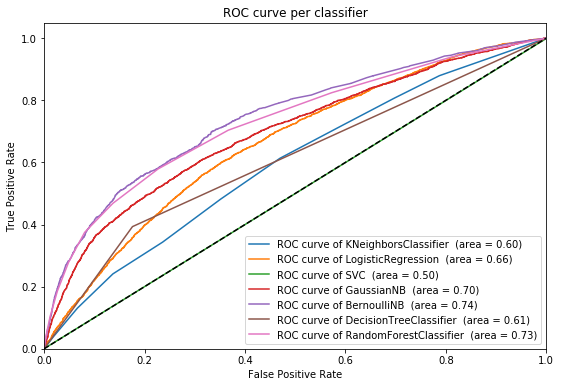

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
y_obs = y_up_test
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([
            KNeighborsClassifier(n_neighbors=10), 
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(),
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X_up, y_up)
    y_pred = alg.predict(X_up_test)

    try:
        y_score = alg.fit(X_up, y_up).decision_function(X_up_test)
    except:
        y_score = (alg.fit(X_up, y_up).predict_proba(X_up_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

In [51]:
y_obs = y_down_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [KNeighborsClassifier(n_neighbors=10),
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(),
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]:
     
    algorithm.fit(X_down_train, y_down_train)
    y_pred = algorithm.predict(X_down_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print('\n')
    print (alg_label)
    print ('-'*20)
    print
    print ("classification report")
    print (classification_report(y_obs, y_pred))
    print
    print ('   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print ('   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print ('   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print ('   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    




KNeighborsClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.60      0.61      0.61      1021
          1       0.58      0.57      0.57       956

avg / total       0.59      0.59      0.59      1977

   accuracy score             0.5903 
   precision score            0.5773 
   recall score               0.5701 
   f1 score                   0.5737 


LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.66      0.49      0.56      1021
          1       0.57      0.73      0.64       956

avg / total       0.62      0.61      0.60      1977

   accuracy score             0.6055 
   precision score            0.5720 
   recall score               0.7312 
   f1 score                   0.6419 


SVC
--------------------
classification report
             precision    recall  f1-score   support

          0       0.00      0.00 

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.67      0.74      0.71      1021
          1       0.69      0.62      0.65       956

avg / total       0.68      0.68      0.68      1977

   accuracy score             0.6813 
   precision score            0.6900 
   recall score               0.6192 
   f1 score                   0.6527 


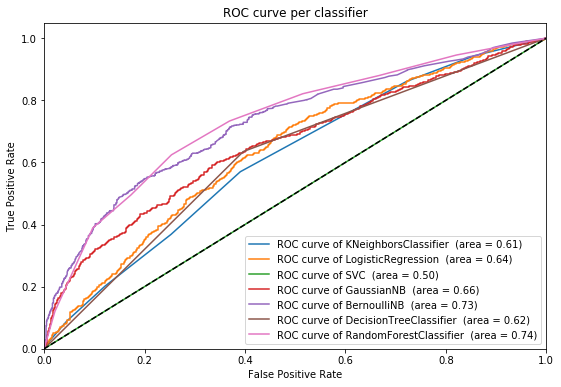

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
y_obs = y_down_test
from sklearn.metrics import roc_curve, auc

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([
            KNeighborsClassifier(n_neighbors=10), 
            LogisticRegression(C=0.001), 
            SVC(),  
            GaussianNB(), 
            BernoulliNB(),
            DecisionTreeClassifier(), 
            RandomForestClassifier()]):
    alg.fit(X_down_train, y_down_train)
    y_pred = alg.predict(X_down_test)

    try:
        y_score = alg.fit(X_down_train, y_down_train).decision_function(X_down_test)
    except:
        y_score = (alg.fit(X_down_train, y_down_train).predict_proba(X_down_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

## Logistic Regression

In [63]:
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=5
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver = 'newton-cg'
        
        
    )
searchCV.fit(X_up_train_norm, y_up)

print ('Max auc_roc:', searchCV.scores_[1].mean(axis=0).max()) 

Max auc_roc: 0.72773641359


In [64]:
searchCV.C_

array([  1.00000000e+09])

In [81]:
#Decision tree classifier
log = LogisticRegression(C=1e9, solver='newton-cg')
fit = log.fit(X_up_train_norm, y_up)
yhat_up = fit.predict(X_up_test_norm)
log_up_score = fit.score(X_up_test_norm, y_up_test)
print(log_up_score)

0.67332570624


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Text(0,0.5,'TPR')

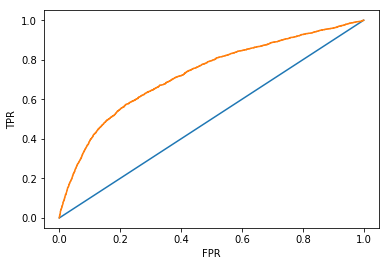

In [82]:
# What about ROC ? 
y_up_score=log.predict_proba(X_up_test_norm)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [83]:
roc_auc

0.72661107550580439

[[8430 2933]
 [4491 6872]]


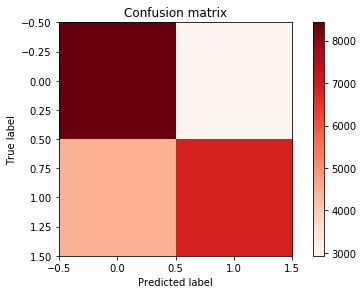

In [84]:
cm=confusion_matrix(y_up_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

In [85]:
df = ccdf.drop('default',1)

In [86]:
i = 0
while i < len(df.columns):
    print(str(df.columns[i]) + '=' + str(log.coef_[0][i]))
    i = i+1

LIMIT_BAL=-1.29500570683
SEX=-3.84074313975
MARRIAGE=-1750.63262926
AGE=10339.6421493
PAY_0=-12651.8425506
PAY_2=431.384508909
PAY_3=36713.4021687
PAY_4=9399.22856725
PAY_5=8323.06526406
PAY_6=5904.68758992
BILL_AMT1=2833.12373947
BILL_AMT2=-6332.55954868
BILL_AMT3=-3286.37400408
BILL_AMT4=-1641.82323722
BILL_AMT5=-0.842750714058
BILL_AMT6=1640.37708247
PAY_AMT1=3282.19269094
PAY_AMT2=0.663757964641
PAY_AMT3=3279.45326275
PAY_AMT4=1638.74166554
PAY_AMT5=-1.57244915776
PAY_AMT6=-1644.32176929
UNIVERSITY=-3286.68374368
GRADUATE=-1.30597848835


## Random Forest

In [87]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier(max_features= 'sqrt' ,n_estimators=10, max_depth = None) 

param_grid = { 
    'n_estimators': [10, 25, 50, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,5,10,25,None]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_up, y_up)
print(CV_rfc.best_params_)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [148]:
#Random forest classifier
rfc = RandomForestClassifier(max_features='sqrt',n_estimators=100)
fit_rfc = rfc.fit(X_up, y_up)
yhat_up = fit_rfc.predict(X_up_test)
rfc_score = fit_rfc.score(X_up_test, y_up_test)
print(rfc_score)

0.677681950189


In [89]:
print(classification_report(y_up_test, yhat_up))

             precision    recall  f1-score   support

          0       0.62      0.92      0.74     11363
          1       0.84      0.43      0.57     11363

avg / total       0.73      0.67      0.65     22726



[[10424   939]
 [ 6501  4862]]


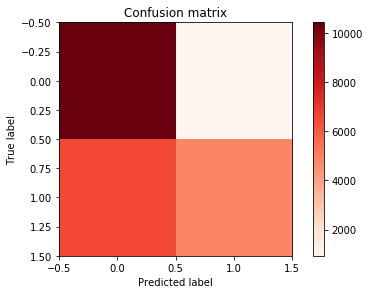

In [90]:
cm=confusion_matrix(y_up_test, yhat_up, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

Text(0,0.5,'TPR')

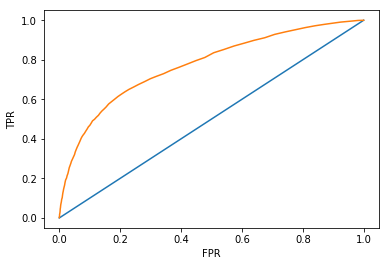

In [91]:
# What about ROC ? 
y_up_score=rfc.predict_proba(X_up_test)[:,1]

fpr_up2, tpr_up2,m = roc_curve(y_up_test, y_up_score)
roc_auc = auc(fpr_up2, tpr_up2)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up2,tpr_up2)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [92]:
roc_auc

0.77213046099022964

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import _tree, export_graphviz


from sklearn.utils import check_random_state

def leaf_depths(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        depths = np.array([0])

    else:
        
        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths

def leaf_samples(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        samples = np.array([tree.n_node_samples[node_id]])

    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples

def draw_tree(ensemble, tree_id=0):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    tree = ensemble.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(depths, histtype='step', color='#9933ff', 
             bins=range(min(depths), max(depths)+1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
    plt.subplot(212)
    
    samples = leaf_samples(tree)
    plt.hist(samples, histtype='step', color='#3399ff', 
             bins=range(min(samples), max(samples)+1))
    
    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
    
    plt.show()

def draw_ensemble(ensemble):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    depths_all = np.array([], dtype=int)

    for x in ensemble.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(depths, histtype='step', color='#ddaaff', 
                 bins=range(min(depths), max(depths)+1))

    plt.hist(depths_all, histtype='step', color='#9933ff', 
             bins=range(min(depths_all), max(depths_all)+1), 
             weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Depth of leaf nodes")
    
    samples_all = np.array([], dtype=int)
    
    plt.subplot(212)
    
    for x in ensemble.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(samples, histtype='step', color='#aaddff', 
                 bins=range(min(samples), max(samples)+1))
    
    plt.hist(samples_all, histtype='step', color='#3399ff', 
             bins=range(min(samples_all), max(samples_all)+1), 
             weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")
    
    plt.show()



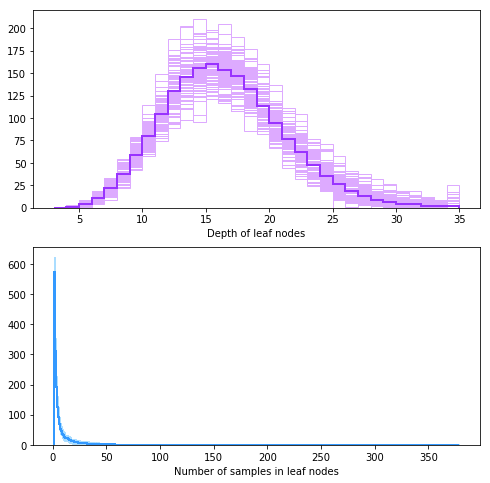

In [94]:
rnd = check_random_state(0)

ensemble = RandomForestRegressor(n_estimators=100,max_depth = 35,  random_state=rnd)
ensemble.fit(X_up,y_up)

draw_ensemble(ensemble)

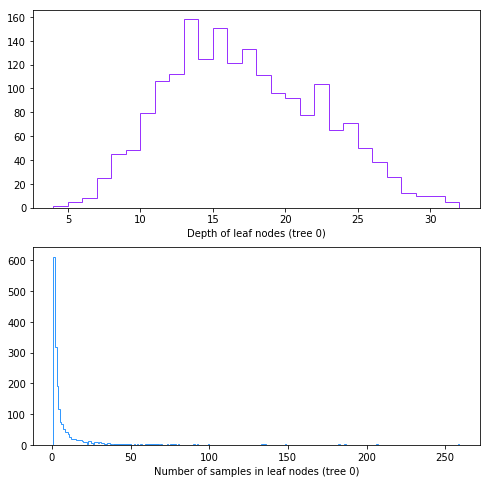

In [95]:
draw_tree(ensemble, tree_id = 0)

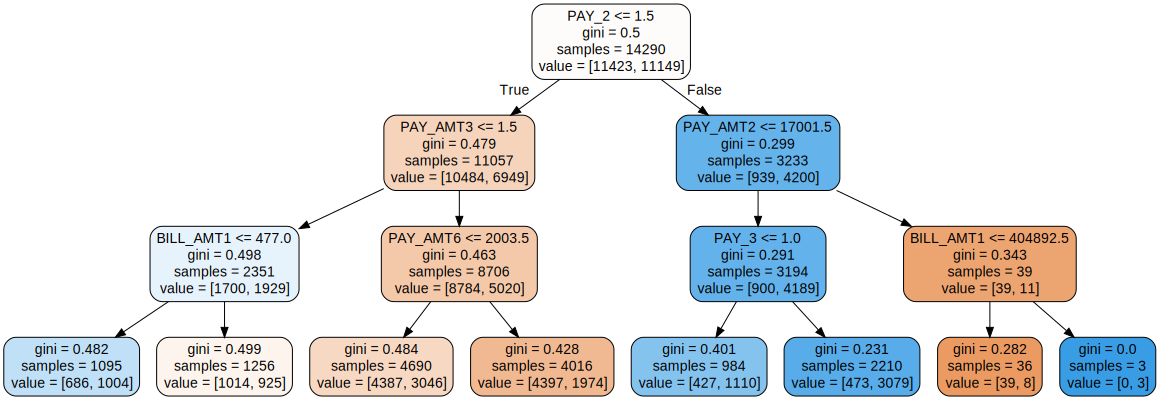

In [154]:
from sklearn.tree import export_graphviz
rfc = RandomForestClassifier(max_features='sqrt',n_estimators=100, max_depth = 3)
fit_rfc = rfc.fit(X_up, y_up)
data = export_graphviz(fit_rfc.estimators_[0],out_file=None,
                feature_names=X_up.columns,
                filled=True,
                rounded=True)
graph = graphviz.Source(data)  
graph

## Decision Tree

In [97]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification



dtc = DecisionTreeClassifier(max_features= 'sqrt' , max_depth = None) 

param_grid = { 
    #'n_estimators': [10, 25, 50, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [1,5,10,25,None]
}

CV_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_up, y_up)
print(CV_rfc.best_params_)

{'max_depth': None, 'max_features': 'auto'}


In [100]:
#Random forest classifier
dtc = DecisionTreeClassifier(max_depth=3)
fit = dtc.fit(X_up, y_up)
yhat_up = fit.predict(X_up_test)
dtc_score = fit.score(X_up_test, y_up_test)
print(dtc_score)

0.700211211828


Text(0,0.5,'TPR')

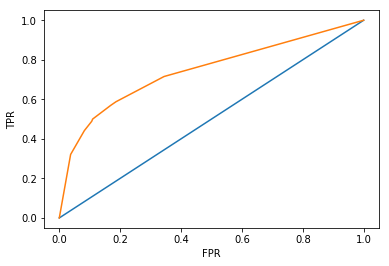

In [101]:
# What about ROC ? 
y_score=dtc.predict_proba(X_up_test)[:,1]

fpr, tpr,_ = roc_curve(y_up_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [102]:
roc_auc

0.74307038251257274

In [103]:
print(classification_report(y_up_test,yhat_up))

             precision    recall  f1-score   support

          0       0.66      0.83      0.73     11363
          1       0.77      0.57      0.66     11363

avg / total       0.71      0.70      0.69     22726



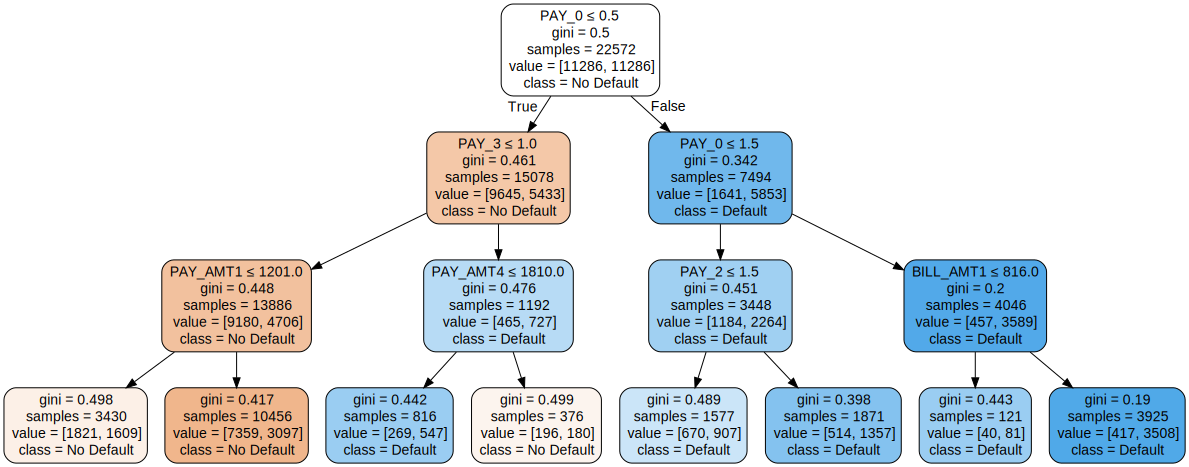

In [105]:
import graphviz 
dot_data = tree.export_graphviz(fit, out_file=None, 
                         feature_names=X_up.columns,  
                         class_names=['No Default', 'Default'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



## Comparing ROC 

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


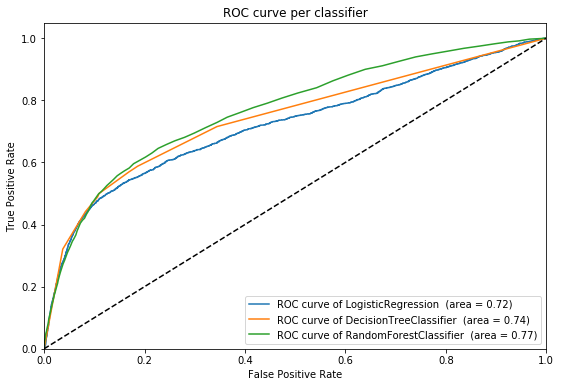

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_curve, auc
y_obs = y_up_test
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)
plt.subplot(1,1,1)

for i, alg in enumerate([
            LogisticRegression(C=1e9, solver='newton-cg',tol = .00000000001), 
            DecisionTreeClassifier(max_depth=3), 
            RandomForestClassifier(max_features='log2',n_estimators=100)]):
    alg.fit(X_up, y_up)
    y_pred = alg.predict(X_up_test)

    try:
        y_score = alg.fit(X_up, y_up).decision_function(X_up_test)
    except:
        y_score = (alg.fit(X_up, y_up).predict_proba(X_up_test))[:,1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr[i], tpr[i], _ = roc_curve(y_obs, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve
    alg_label = str(alg)
    alg_label = alg_label[:alg_label.index('(')]
    plt.plot(fpr[i], tpr[i], label='ROC curve of ' + alg_label+ '  (area = {1:0.2f})'.format(alg_label, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per classifier')
plt.legend(loc="lower right")

In [107]:
y_obs = y_up_test

accuracy_dict = dict()
precision_dict = dict()
recall_dict = dict()
f1_dict = dict()
 
for algorithm in [
             LogisticRegression(C=1e9, solver='newton-cg',tol = .00000000001), 
            DecisionTreeClassifier(max_depth=3), 
            RandomForestClassifier(max_features='log2',n_estimators=100)]:
     
    algorithm.fit(X_up, y_up)
    y_pred = algorithm.predict(X_up_test)
    alg_label = str(algorithm)
    alg_label = alg_label[:alg_label.index('(')]
    
    # create dictionary of stats
    accuracy_dict[alg_label] = accuracy_score(y_obs, y_pred)
    precision_dict[alg_label] = precision_score(y_obs, y_pred)
    recall_dict[alg_label] = recall_score(y_obs, y_pred)
    f1_dict[alg_label] = f1_score(y_obs, y_pred)

    print('\n')
    print (alg_label)
    print ('-'*20)
    print
    print ("classification report")
    print (classification_report(y_obs, y_pred))
    print
    print ('   accuracy score             %.4f ' % (accuracy_score(y_obs, y_pred)))
    print ('   precision score            %.4f ' % precision_score(y_obs, y_pred))
    print ('   recall score               %.4f ' % recall_score(y_obs, y_pred))
    print ('   f1 score                   %.4f ' % f1_score(y_obs, y_pred))
    



/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)




LogisticRegression
--------------------
classification report
             precision    recall  f1-score   support

          0       0.66      0.72      0.69     11363
          1       0.69      0.63      0.66     11363

avg / total       0.67      0.67      0.67     22726

   accuracy score             0.6734 
   precision score            0.6910 
   recall score               0.6273 
   f1 score                   0.6576 


DecisionTreeClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0       0.66      0.83      0.73     11363
          1       0.77      0.57      0.66     11363

avg / total       0.71      0.70      0.69     22726

   accuracy score             0.7002 
   precision score            0.7712 
   recall score               0.5693 
   f1 score                   0.6551 


RandomForestClassifier
--------------------
classification report
             precision    recall  f1-score   support

          0 

## Comparing results with a potential gains function.

I added a potential gains function to the results and tested at varying tolerance levels.  I then chose the result that gave me the highest profit.  I worked with the assumption that if a card holder is predicted to default then we would sell their debt to a debt collector at a rate of 5% of their balance and if they are not predicted to default then they are kept on their payment plan.  I also worked with the assumptions that a false positive, a card holder was predicted to default when they actually would have payed, will make 5% instead of 100%.  A false negative was assumed to make the company 0% instead of 5% if their dabt had been sold to a collections agency.  

In [108]:
def predict_with_cutoff(y_prob, threshold):
    y_pred = [1 if x >= threshold else 0 for x in y_prob]
    return y_pred

In [109]:
def cost(cm):
    tn, fp, fn, tp = cm.ravel()
    cost = (tn) + (tp * .05) + (fp * .05)
    return cost


def get_costlist(yhat):
    cost_list = []
    for i in yhat:
        cm=confusion_matrix(y_up_test, i, labels=None)
        cost_list.append(cost(cm))
    return cost_list

def get_score(cost_list, cm):
    tn, fp, fn, tp = cm.ravel()
    return max(cost_list)/(tn + fp + (fn + tp)*.05)

def getyhat(regressor, m, X_test):
    yhat = []
    y_score = regressor.predict_proba(X_test)[:,1]
    for i in m:
        yhat.append(predict_with_cutoff(y_score, i))
    return yhat

def getindex(cost_list):
    index = 0
    for i in cost_list:
        if max(cost_list) == i:
            ind = index
            index = index + 1
        else:
            index = index + 1
    return ind

In [110]:
m = np.linspace(0,1,1e3)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [111]:
yhat_list_log = getyhat(log, m, X_up_test_norm)

In [112]:
cost_list_log = get_costlist(yhat_list_log)

In [113]:
index_log = getindex(cost_list_log)

In [114]:
y_up_score=log.predict_proba(X_up_test_norm)[:,1]

In [118]:
yhat_log = predict_with_cutoff(y_up_score, m[index_log])

In [122]:
cm_log = confusion_matrix(y_up_test, yhat_log, labels=None)

In [123]:
score_log = get_score(cost_list_log,cm_log)

[[11363     0]
 [11363     0]]


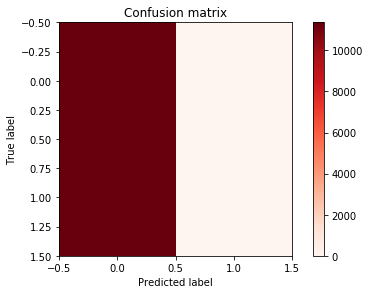

In [136]:
plt.figure()
plot_confusion_matrix(cm_log)
print(cm_log)

In [126]:
score_log

0.95238095238095244

In [139]:
yhat_list_rfc = getyhat(rfc, m, X_up_test)
cost_list_rfc = get_costlist(yhat_list_rfc)
index_rfc = getindex(cost_list_rfc)
y_up_score_rfc = rfc.predict_proba(X_up_test)[:,1]
yhat_rfc = predict_with_cutoff(y_up_score_rfc, m[index_rfc])
cm_rfc = confusion_matrix(y_up_test, yhat_rfc, labels=None)
score_rfc = get_score(cost_list_rfc,cm_rfc)

[[11361     2]
 [11281    82]]


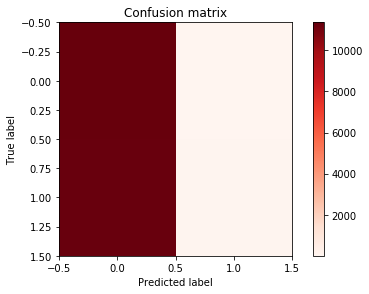

In [140]:
plt.figure()
plot_confusion_matrix(cm_rfc)
print(cm_rfc)

In [141]:
score_rfc

0.95256534365924506

In [142]:
yhat_list_dtc = getyhat(dtc, m, X_up_test)
cost_list_dtc = get_costlist(yhat_list_dtc)
index_dtc = getindex(cost_list_dtc)
y_up_score_dtc = dtc.predict_proba(X_up_test)[:,1]
yhat_dtc = predict_with_cutoff(y_up_score_dtc, m[index_dtc])
cm_dtc = confusion_matrix(y_up_test, yhat_dtc, labels=None)
score_dtc = get_score(cost_list_dtc,cm_dtc)

[[11363     0]
 [11363     0]]


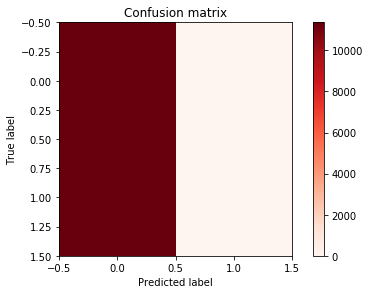

In [143]:
plt.figure()
plot_confusion_matrix(cm_dtc)
print(cm_dtc)

In [144]:
score_dtc

0.95238095238095244